In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import kagglehub

path = kagglehub.dataset_download("amldvvs/avocado-ripeness-classification-dataset") 

print("Path to dataset files:", path)

Path to dataset files: C:\Users\MANHA-CITHA\.cache\kagglehub\datasets\amldvvs\avocado-ripeness-classification-dataset\versions\1


In [33]:
df= pd.read_csv(r"C:\Users\MANHA-CITHA\.cache\kagglehub\datasets\amldvvs\avocado-ripeness-classification-dataset\versions\1\avocado_ripeness_dataset.csv")

In [35]:
df

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking
...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard
246,21.6,17,36,19,black,47,182,240,firm-ripe
247,14.0,4,40,17,black,37,188,274,ripe
248,61.5,63,87,75,green,65,261,162,pre-conditioned


In [37]:
cat_col = df.select_dtypes(include= 'object')
for col in cat_col:
    print(f"{col} has {df[col].unique()}")

color_category has ['black' 'green' 'dark green' 'purple']
ripeness has ['ripe' 'pre-conditioned' 'hard' 'breaking' 'firm-ripe']


In [39]:
df = pd.get_dummies(df, columns=['color_category'], prefix='color', dtype=int)

In [41]:
ripeness_order = [['hard', 'pre-conditioned', 'breaking', 'firm-ripe', 'ripe']]
encoder = OrdinalEncoder(categories=ripeness_order)
df['ripeness'] = encoder.fit_transform(df[['ripeness']])

In [43]:
df.corr()['ripeness'].drop("ripeness")

firmness           -0.982721
hue                -0.078318
saturation         -0.834224
brightness         -0.725416
sound_db           -0.972818
weight_g           -0.744662
size_cm3            0.958539
color_black         0.771517
color_dark green   -0.707107
color_green        -0.353553
color_purple        0.154303
Name: ripeness, dtype: float64

In [45]:
X= df.drop(columns= 'ripeness') 
y= df['ripeness']

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        14
         4.0       1.00      1.00      1.00        16

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



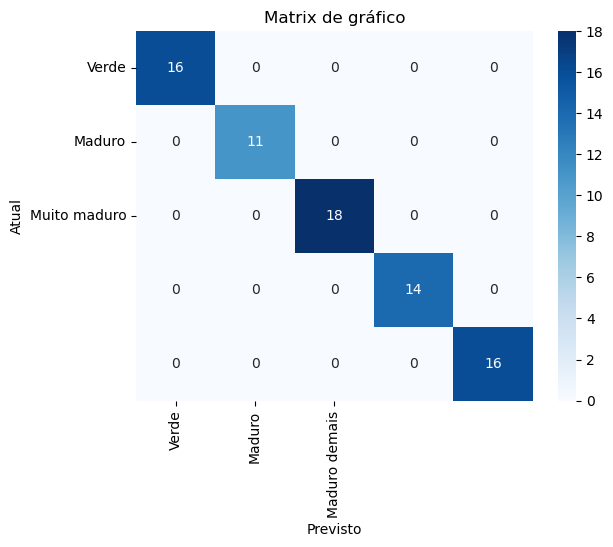

In [47]:
y= df['ripeness'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Verde", "Maduro", "Maduro demais"], yticklabels=["Verde", "Maduro", "Muito maduro"])
plt.xlabel("Previsto")
plt.ylabel("Atual")
plt.title("Matrix de gráfico")
plt.show()

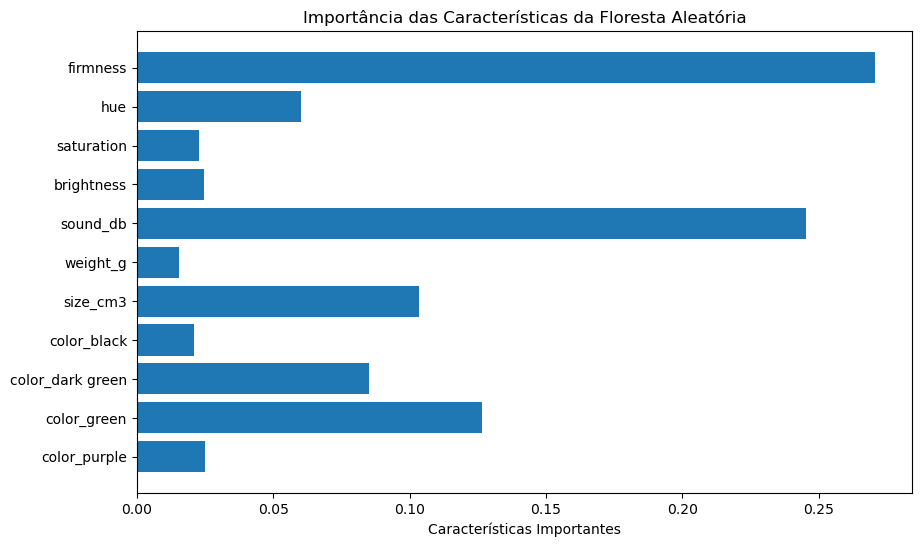

In [49]:
importances = clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Características Importantes")
plt.title("Importância das Características da Floresta Aleatória")
plt.gca().invert_yaxis()
plt.show()

In [51]:
scores = cross_val_score(clf, X, y, cv=5)
print("Pontuações de precisão de validação cruzada:", scores)
print("Precisão média: ", scores.mean())

Pontuações de precisão de validação cruzada: [1. 1. 1. 1. 1.]
Precisão média:  1.0


In [53]:
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,               # Limitar a profundidade da ávore
    min_samples_leaf=5,        # Evite folhas pequenas
    max_features='sqrt',       # Use substratos
    random_state=42
)

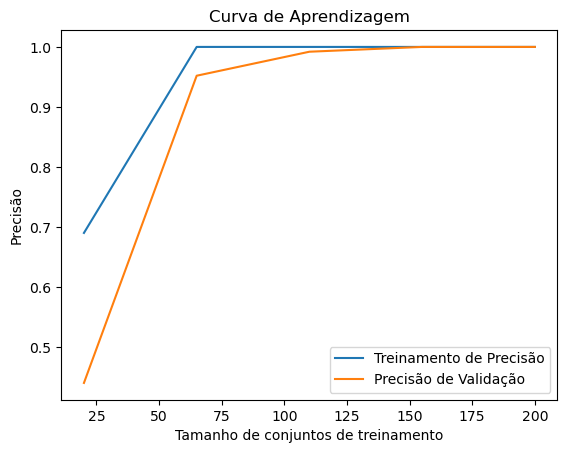

In [55]:
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Treinamento de Precisão')
plt.plot(train_sizes, test_scores_mean, label='Precisão de Validação')
plt.xlabel('Tamanho de conjuntos de treinamento')
plt.ylabel('Precisão')
plt.legend()
plt.title('Curva de Aprendizagem')
plt.show()